In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [85]:
data = pd.read_csv("candidates.csv")

In [86]:
data.describe()

,admitted,gmat,gpa,work_experience
count,40.000000,40.000000,40.000000,40.000000
mean,0.525000,654.000000,3.095000,3.425000
std,0.505736,61.427464,0.631218,1.737778
min,0.000000,540.000000,1.700000,1.000000
25%,0.000000,607.500000,2.700000,2.000000
50%,1.000000,660.000000,3.300000,4.000000
75%,1.000000,690.000000,3.700000,5.000000
max,1.000000,780.000000,4.000000,6.000000


In [87]:
data = data.dropna()

In [88]:
data.head()

,admitted,gmat,gpa,work_experience
0,1,780,4.0,3
1,1,750,3.9,4
2,1,690,3.3,3
3,1,710,3.7,5
4,1,680,3.9,4


In [89]:
data.describe()

,admitted,gmat,gpa,work_experience
count,40.000000,40.000000,40.000000,40.000000
mean,0.525000,654.000000,3.095000,3.425000
std,0.505736,61.427464,0.631218,1.737778
min,0.000000,540.000000,1.700000,1.000000
25%,0.000000,607.500000,2.700000,2.000000
50%,1.000000,660.000000,3.300000,4.000000
75%,1.000000,690.000000,3.700000,5.000000
max,1.000000,780.000000,4.000000,6.000000


In [90]:
data_grouped = data.groupby('admitted').mean()

In [91]:
data_grouped

,gmat,gpa,work_experience
admitted,,,
0,606.842105,2.563158,2.000000
1,696.666667,3.576190,4.714286


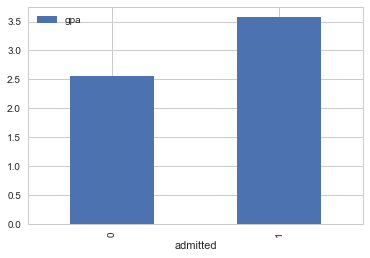

In [92]:
data_grouped[['gpa']].plot(kind = 'bar')

In [93]:
X = data[['gmat', 'gpa','work_experience']]
y = data['admitted']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [115]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [116]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

In [117]:
confusion_matrix

Predicted,0,1
Actual,,
0,5,2
1,0,5


In [118]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8333333333333334


In [119]:
y_values = pd.DataFrame({"Actual":y_test,"predicted":y_pred})

In [120]:
pd.concat([X_test,y_values], axis=1)

,gmat,gpa,work_experience,Actual,predicted
22,550,2.3,4,0,1
20,620,3.3,2,0,0
25,670,3.3,6,1,1
4,680,3.9,4,1,1
10,610,2.7,3,0,1
15,610,3.0,1,0,0
28,650,3.7,6,1,1
11,690,3.7,5,1,1
18,540,2.7,2,0,0
29,660,3.3,5,1,1


In [121]:
logistic_regression.score(X,y) 

0.875